Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8718 - loss: 0.4302 - val_accuracy: 0.9833 - val_loss: 0.0596
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9807 - loss: 0.0606 - val_accuracy: 0.9867 - val_loss: 0.0486
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9878 - val_loss: 0.0390
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9901 - loss: 0.0320 - val_accuracy: 0.9885 - val_loss: 0.0459
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9870 - val_loss: 0.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0446
Test accuracy: 0.9876


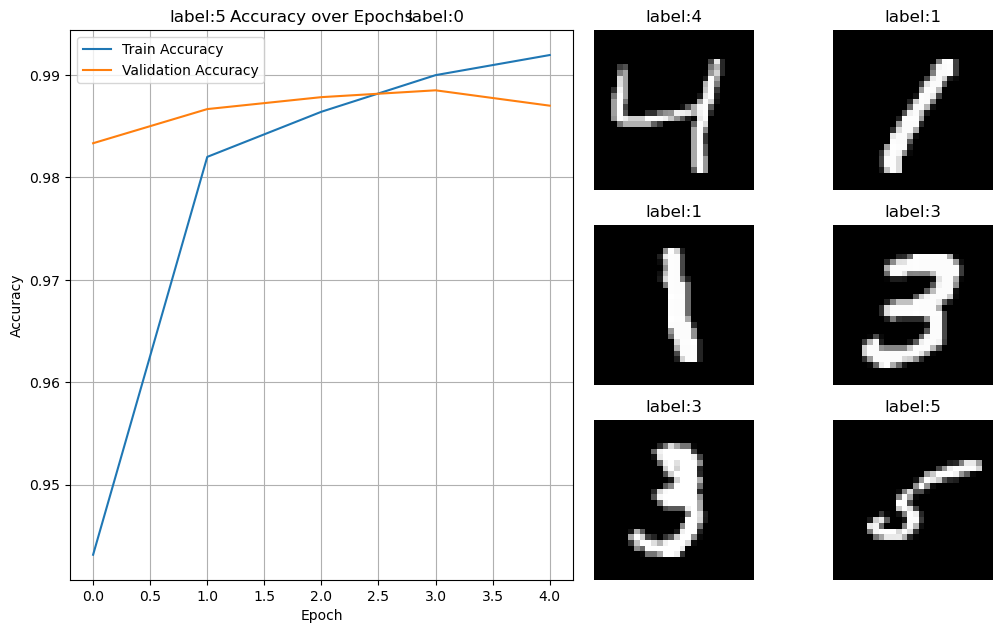

<function matplotlib.pyplot.show(close=None, block=None)>

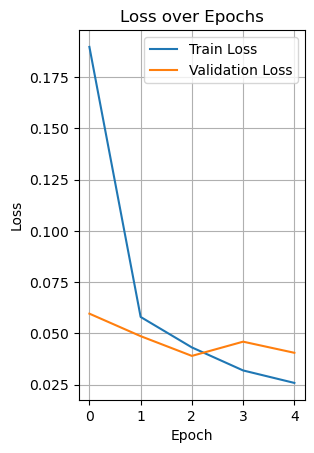

In [ ]:
# importing libraries and modules
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the image
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0

# visualizing the sample images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"label:{y_train[i]}")
    plt.axis("off")
plt.tight_layout()

# build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # First pooling layer
    layers.Conv2D(64, (3, 3), activation="relu"),                          # Second convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # Second pooling layer
    layers.Flatten(),                                                     # Flatten the 2D feature maps into 1D
    layers.Dense(64, activation="relu"),                                  # Fully connected (dense) layer
    layers.Dense(10, activation="softmax")                                # Output layer for 10 classes (digits 0–9)
])

# compile the model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",  #appropriate for integer labels
              metrics=["accuracy"])

# train the model and store history
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy:", round(test_acc, 4))

plt.figure(figsize=(12, 5))

# plot training and validation accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker="o")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker="x")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# plot the training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show